- **Regression** logistique : col num uniquement
score train, score test, pipeline(knnimputer, standard scaler, regression log) = dans gridsearch avec 10 crossvalidation et ressortir le score

- *Pipeline*(features num, knnimputer, scaler, et features cat à onehot (knn imputer random forest classifier,dummy regressor, reg log, KNN)) = calculer ACCURACY SCORE
et resultgrid

On peut frac = 0.25 , 0.30 ou 0.20


[mon super lien](http://cneuuziu.com)

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


In [8]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector


In [9]:

# Feature Selection
import shap

<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [10]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
0,Cash loans,48,1976-05-24,196888,0,Married,-152,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,0.757069,N
1,Cash loans,55,1969-12-17,101392,0,Civil marriage,-717,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,0.818248,Y
2,Cash loans,25,1999-01-22,435135,0,Single / not married,-667,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,NaN,N
3,Cash loans,30,1994-12-08,396314,0,Married,-1825,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,0.336062,N
4,Cash loans,44,1980-03-29,341153,1,Married,-159,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,0.673830,N


In [11]:
df.shape

(30751, 19)

In [12]:
df.tail()

,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
30746,Cash loans,41,1983-01-02,311641,0,Married,-914,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,0.759712,N
30747,Cash loans,38,1986-06-11,151728,1,Single / not married,-7215,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,NaN,N
30748,Revolving loans,44,1980-11-17,384640,0,Married,365243,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,NaN,Y
30749,Cash loans,60,1964-01-17,437079,0,Widow,365243,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,NaN,N
30750,Cash loans,59,1965-09-14,389739,0,Widow,-974,1288350.0,37053.0,Y,1.0,Working,F,1125000.0,Secondary / secondary special,148500.0,0.670388,0.157595,Y


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TYPE_CONTRAT            30751 non-null  object 
 1   AGE                     30751 non-null  int64  
 2   DATE_NAISSANCE          30751 non-null  object 
 3   ID_CLIENT               30751 non-null  int64  
 4   CIBLE                   30751 non-null  int64  
 5   STATUT_FAMILIAL         30751 non-null  object 
 6   JOURS_EMPLOI            30751 non-null  int64  
 7   TOTAL_CREDIT            30751 non-null  float64
 8   REMB_MENSUEL            30751 non-null  float64
 9   PROPRIETAIRE_BIEN_IMMO  30751 non-null  object 
 10  CNT_FAM_MEMBERS         30751 non-null  float64
 11  TYPE_REVENUS            30751 non-null  object 
 12  GENRE                   30751 non-null  object 
 13  MONTANT_PRIX_BIENS      30727 non-null  float64
 14  NIVEAU_EDUCATION        30751 non-null

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


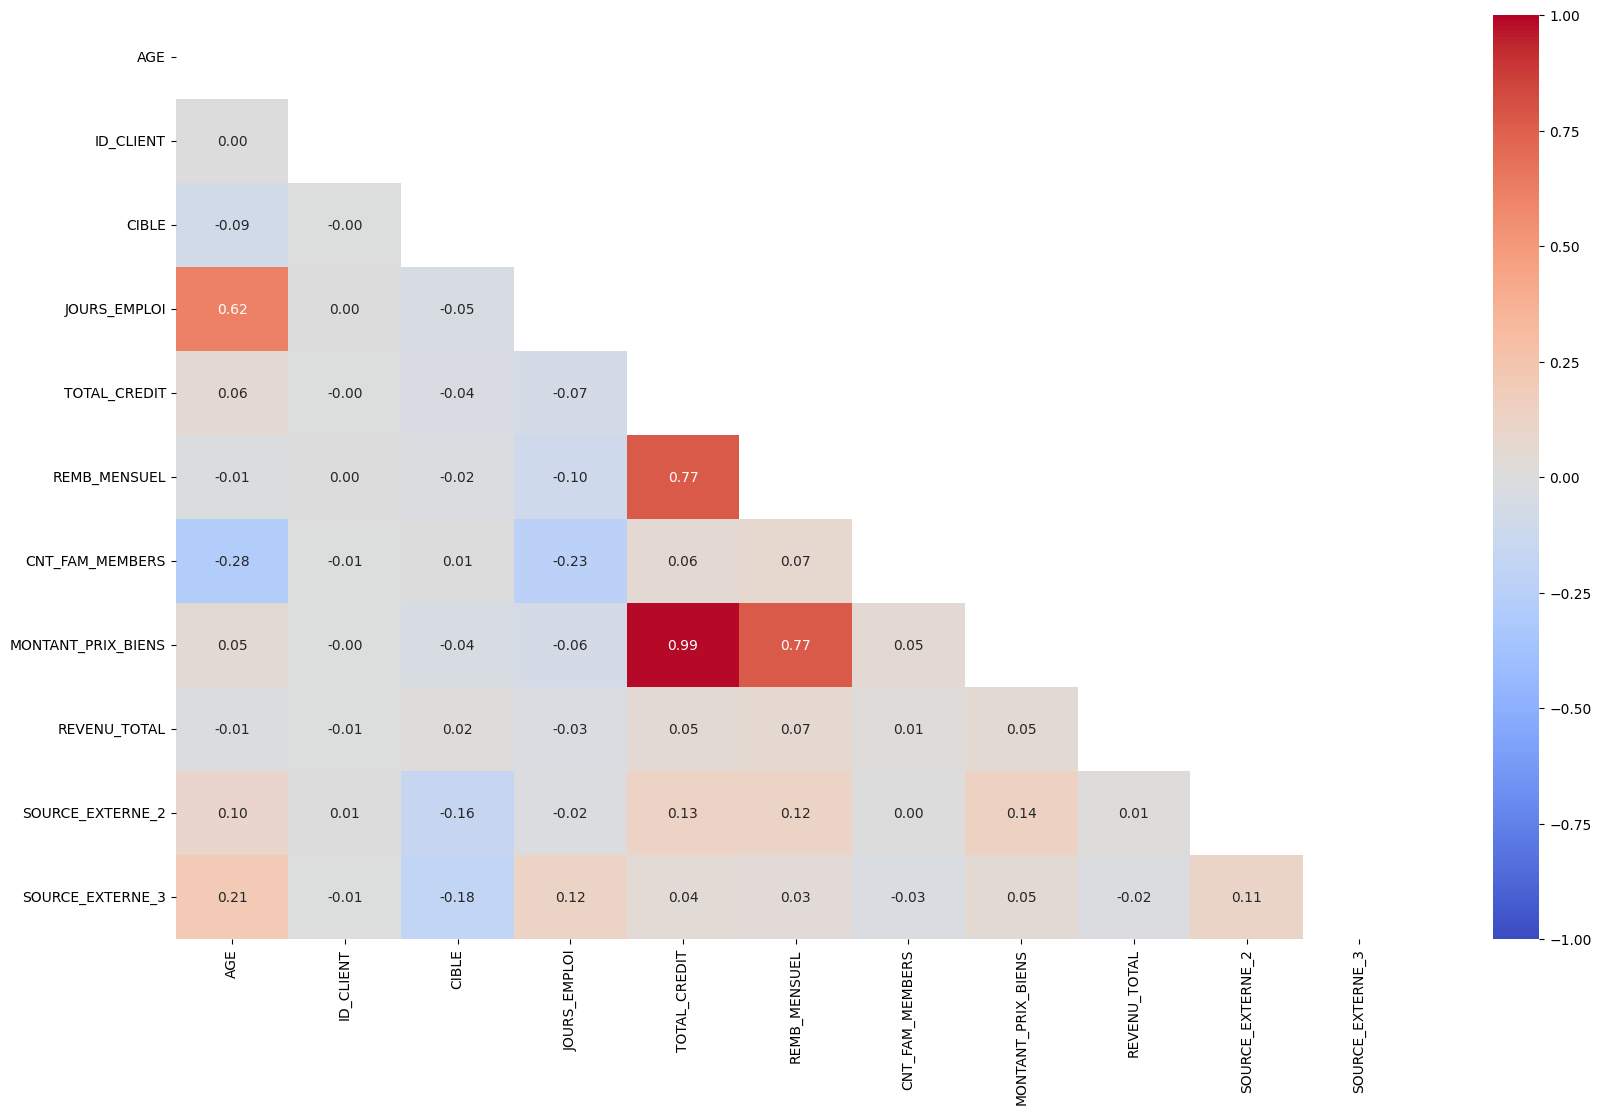

In [14]:
plt.figure(figsize=(20, 12))
corr = df.select_dtypes(include=("float64", "int64")).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask, annot=True)
plt.show()

In [15]:
df = df.sample(frac=0.10)


In [16]:
df

,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
29579,Cash loans,24,2000-06-05,306823,0,Single / not married,-1050,450000.0,22860.0,N,1.0,Working,M,450000.0,Secondary / secondary special,180000.0,0.319520,0.508287,Y
18605,Cash loans,67,1957-09-20,279640,0,Separated,365243,254700.0,24939.0,N,1.0,Pensioner,F,225000.0,Higher education,180000.0,0.714975,0.835777,N
4009,Cash loans,48,1976-04-13,187547,0,Married,-970,724981.5,30717.0,Y,2.0,Commercial associate,M,648000.0,Secondary / secondary special,202500.0,0.712164,0.339288,N
6670,Cash loans,35,1989-12-23,366383,0,Married,-3911,395766.0,19170.0,N,2.0,Working,F,283500.0,Secondary / secondary special,90000.0,0.504266,0.695622,N
7565,Cash loans,36,1988-12-06,347159,0,Married,-209,112500.0,12852.0,N,2.0,Commercial associate,M,112500.0,Higher education,90000.0,0.535673,0.584990,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9396,Cash loans,27,1997-05-14,376490,0,Married,-232,450000.0,20979.0,N,3.0,Working,F,450000.0,Secondary / secondary special,67500.0,0.567508,0.100804,Y
9614,Cash loans,48,1976-06-26,295677,0,Married,-1484,1215000.0,39325.5,Y,2.0,Working,M,1215000.0,Incomplete higher,225000.0,0.697208,0.431192,Y
14269,Cash loans,61,1963-01-12,320796,0,Married,365243,695439.0,20331.0,N,4.0,Pensioner,F,580500.0,Secondary / secondary special,180000.0,0.680911,0.515495,N
5590,Revolving loans,32,1992-09-23,181884,0,Married,-1079,540000.0,27000.0,N,4.0,Working,M,540000.0,Higher education,270000.0,0.591973,0.345785,Y


In [17]:
19/3000

0.006333333333333333

In [18]:
# df_1 =df.loc[df.CIBLE==1]
# df_1

In [19]:
# n = df_1.shape[0]

In [20]:
# df_0 = df.loc[df.CIBLE==0]
# df_0 = df_0.sample(n)
# df_0

In [21]:
# df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
# df

In [22]:
y = df["CIBLE"]

In [23]:
y.shape

(3075,)

In [24]:
# Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ["ID_CLIENT", "CIBLE", "DATE_NAISSANCE"]
x_train.drop(col_cible, axis=1, inplace=True)
x_train

,TYPE_CONTRAT,AGE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
29579,Cash loans,24,Single / not married,-1050,450000.0,22860.0,N,1.0,Working,M,450000.0,Secondary / secondary special,180000.0,0.319520,0.508287,Y
18605,Cash loans,67,Separated,365243,254700.0,24939.0,N,1.0,Pensioner,F,225000.0,Higher education,180000.0,0.714975,0.835777,N
4009,Cash loans,48,Married,-970,724981.5,30717.0,Y,2.0,Commercial associate,M,648000.0,Secondary / secondary special,202500.0,0.712164,0.339288,N
6670,Cash loans,35,Married,-3911,395766.0,19170.0,N,2.0,Working,F,283500.0,Secondary / secondary special,90000.0,0.504266,0.695622,N
7565,Cash loans,36,Married,-209,112500.0,12852.0,N,2.0,Commercial associate,M,112500.0,Higher education,90000.0,0.535673,0.584990,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9396,Cash loans,27,Married,-232,450000.0,20979.0,N,3.0,Working,F,450000.0,Secondary / secondary special,67500.0,0.567508,0.100804,Y
9614,Cash loans,48,Married,-1484,1215000.0,39325.5,Y,2.0,Working,M,1215000.0,Incomplete higher,225000.0,0.697208,0.431192,Y
14269,Cash loans,61,Married,365243,695439.0,20331.0,N,4.0,Pensioner,F,580500.0,Secondary / secondary special,180000.0,0.680911,0.515495,N
5590,Revolving loans,32,Married,-1079,540000.0,27000.0,N,4.0,Working,M,540000.0,Higher education,270000.0,0.591973,0.345785,Y


In [25]:
x_train.shape

(3075, 16)

In [26]:
categ_col = x_train.select_dtypes(["object"]).columns
num_col = x_train.select_dtypes(["float64", "int64"]).columns

In [27]:
categ_col

Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object')

In [28]:
categ_col.shape

(7,)

In [29]:
num_col

Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')

In [30]:
num_col.shape

(9,)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [31]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)


preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, categ_col),
    ],
    remainder="drop",
)



pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_1),
        ("sampler", RandomUnderSampler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [32]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [33]:
param_grid = {

    "estimator": [RandomForestClassifier()],  # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}

param_grid

{'estimator': [RandomForestClassifier()],
 'estimator__n_estimators': [100, 200, 300, 500]}

In [34]:
from sklearn.metrics import get_scorer_names # mettre en haut

In [35]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [36]:
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [37]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

Pipeline Steps: {'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['TYPE_CONTRAT', 'STATUT

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [38]:
resultize(grid_1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,1.712600,0.140443,0.066599,0.010093,RandomForestClassifier(),500,"{'estimator': RandomForestClassifier(), 'estim...",0.213315,0.009085,1,0.341237,0.008505
1,0.912797,0.110685,0.062800,0.014077,RandomForestClassifier(),200,"{'estimator': RandomForestClassifier(), 'estim...",0.198799,0.022296,2,0.348889,0.010465
2,1.218395,0.075507,0.066002,0.015372,RandomForestClassifier(),300,"{'estimator': RandomForestClassifier(), 'estim...",0.198681,0.018771,3,0.346928,0.009329
0,0.424001,0.017506,0.039404,0.005648,RandomForestClassifier(),100,"{'estimator': RandomForestClassifier(), 'estim...",0.186183,0.013242,4,0.343366,0.010563


In [39]:
y.value_counts(normalize=True)

CIBLE
0    0.92
1    0.08
Name: proportion, dtype: float64

In [40]:
best_model = grid_1.best_estimator_

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[...eimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                ('sampler', RandomUnderSampler()),
                ('estimator', RandomForestClassifier(n_estimators=500))])

In [41]:

# mettre en haut ==> double import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [42]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y, test_size=0.2, random_state=42
)

## Init and Fit a Grid Search

In [43]:
# Utilisez GridSearchCV pour ajuster votre modèle
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [44]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'DATE_NAISSANCE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'JOURS_EMPLOI',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'PROPRIETAIRE_VOITURE']

In [45]:
pipe = grid_1.best_estimator_
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[...eimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                ('sampler', RandomUnderSampler()),
                ('estimator', RandomForestClassifier(n_estimators=500))])

In [46]:
X_train.shape

(2460, 16)

## Feature Importance

In [47]:
est = pipe.steps[-1]
est = est[1]
est

RandomForestClassifier(n_estimators=500)

In [48]:
preprocessor = pipe[:-1]

In [49]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names_out

array(['num__AGE', 'num__JOURS_EMPLOI', 'num__TOTAL_CREDIT',
       'num__REMB_MENSUEL', 'num__CNT_FAM_MEMBERS',
       'num__MONTANT_PRIX_BIENS', 'num__REVENU_TOTAL',
       'num__SOURCE_EXTERNE_2', 'num__SOURCE_EXTERNE_3',
       'cat__TYPE_CONTRAT_Cash loans',
       'cat__TYPE_CONTRAT_Revolving loans',
       'cat__STATUT_FAMILIAL_Civil marriage',
       'cat__STATUT_FAMILIAL_Married', 'cat__STATUT_FAMILIAL_Separated',
       'cat__STATUT_FAMILIAL_Single / not married',
       'cat__STATUT_FAMILIAL_Widow', 'cat__PROPRIETAIRE_BIEN_IMMO_N',
       'cat__PROPRIETAIRE_BIEN_IMMO_Y',
       'cat__TYPE_REVENUS_Commercial associate',
       'cat__TYPE_REVENUS_Pensioner', 'cat__TYPE_REVENUS_State servant',
       'cat__TYPE_REVENUS_Working', 'cat__GENRE_F', 'cat__GENRE_M',
       'cat__NIVEAU_EDUCATION_Academic degree',
       'cat__NIVEAU_EDUCATION_Higher education',
       'cat__NIVEAU_EDUCATION_Incomplete higher',
       'cat__NIVEAU_EDUCATION_Lower secondary',
       'cat__NIVEAU_EDUCAT

In [50]:
feat_imp = est.feature_importances_
feat_imp 

array([0.07670443, 0.07958213, 0.08973699, 0.09125537, 0.03124095,
       0.08064281, 0.07838408, 0.12338184, 0.14912078, 0.0063847 ,
       0.00616813, 0.0082638 , 0.01165018, 0.00453166, 0.008452  ,
       0.00284839, 0.01151497, 0.01071742, 0.01038087, 0.0065871 ,
       0.00511602, 0.0134902 , 0.02064262, 0.02081559, 0.        ,
       0.01352885, 0.00325011, 0.00213369, 0.0106711 , 0.01150544,
       0.0112978 ])

In [51]:
len(est.feature_importances_)

31

In [52]:
feature_imp_dict = {k: v for k, v in zip(feature_names_out, feat_imp)}
feature_imp_dict

{'num__AGE': 0.07670442677351802,
 'num__JOURS_EMPLOI': 0.07958212807084286,
 'num__TOTAL_CREDIT': 0.08973698867369498,
 'num__REMB_MENSUEL': 0.09125536503217738,
 'num__CNT_FAM_MEMBERS': 0.031240949748294174,
 'num__MONTANT_PRIX_BIENS': 0.08064280836025427,
 'num__REVENU_TOTAL': 0.07838408454408065,
 'num__SOURCE_EXTERNE_2': 0.12338183957502195,
 'num__SOURCE_EXTERNE_3': 0.14912077941938273,
 'cat__TYPE_CONTRAT_Cash loans': 0.006384702339959337,
 'cat__TYPE_CONTRAT_Revolving loans': 0.006168133454283632,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.008263800007100173,
 'cat__STATUT_FAMILIAL_Married': 0.01165018015690447,
 'cat__STATUT_FAMILIAL_Separated': 0.004531660441862285,
 'cat__STATUT_FAMILIAL_Single / not married': 0.008451996180928565,
 'cat__STATUT_FAMILIAL_Widow': 0.002848392717346591,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 0.011514973699869827,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 0.010717416872997671,
 'cat__TYPE_REVENUS_Commercial associate': 0.010380865844212116,
 'cat__TYPE_REVENU

In [53]:
# Recupere la feat importance, créé un pd.Serie et on filtre
feature_imp_ser = pd.Series(feature_imp_dict)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)

feature_imp_ser

num__SOURCE_EXTERNE_3                                  0.1491
num__SOURCE_EXTERNE_2                                  0.1234
num__REMB_MENSUEL                                      0.0913
num__TOTAL_CREDIT                                      0.0897
num__MONTANT_PRIX_BIENS                                0.0806
num__JOURS_EMPLOI                                      0.0796
num__REVENU_TOTAL                                      0.0784
num__AGE                                               0.0767
num__CNT_FAM_MEMBERS                                   0.0312
cat__GENRE_M                                           0.0208
cat__GENRE_F                                           0.0206
cat__NIVEAU_EDUCATION_Higher education                 0.0135
cat__TYPE_REVENUS_Working                              0.0135
cat__STATUT_FAMILIAL_Married                           0.0117
cat__PROPRIETAIRE_BIEN_IMMO_N                          0.0115
cat__PROPRIETAIRE_VOITURE_N                            0.0115
cat__PRO

In [54]:
# save la feat importance

import pickle as pk  #  remonter la haut

with open("feat_importance.pk", "wb") as f : 
    pk.dump(feature_imp_ser, f)

## Travaille sur Shap

In [55]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 

    return pipe.steps[-1][1]

In [56]:
x_train_after_preprocess = build_x_train_preprocessor(pipe, X_train)
x_train_after_preprocess

,num__AGE,num__JOURS_EMPLOI,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__SOURCE_EXTERNE_3,cat__TYPE_CONTRAT_Cash loans,...,cat__TYPE_REVENUS_Working,cat__GENRE_F,cat__GENRE_M,cat__NIVEAU_EDUCATION_Academic degree,cat__NIVEAU_EDUCATION_Higher education,cat__NIVEAU_EDUCATION_Incomplete higher,cat__NIVEAU_EDUCATION_Lower secondary,cat__NIVEAU_EDUCATION_Secondary / secondary special,cat__PROPRIETAIRE_VOITURE_N,cat__PROPRIETAIRE_VOITURE_Y
0,-0.787754,-0.457739,0.169621,-0.368044,-0.191613,0.346835,0.369339,0.266958,-0.773222,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.809765,-0.466561,-1.038120,-1.032064,-1.277712,-1.020708,-0.791078,0.433216,1.374104,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.053046,-0.458648,1.714408,1.001005,0.894487,1.582423,-0.558995,-1.424048,1.268884,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.628553,-0.450486,4.149436,2.086948,-1.277712,4.665394,1.935903,0.434310,-2.430874,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.482404,2.145354,-0.383131,-0.141742,-0.191613,-0.252964,-0.930329,-2.394934,1.098103,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,-0.703674,-0.457660,-0.714782,-0.774779,-1.277712,-0.612844,-0.558995,-0.633512,1.733895,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2456,-1.124074,-0.453881,-0.162030,-0.284813,-0.191613,-0.013044,-0.094828,-0.990730,-1.228800,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2457,-0.451434,-0.458790,-1.046434,-1.230420,-0.191613,-0.972724,-1.023162,-1.219700,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2458,-0.787754,-0.491799,0.059070,0.288383,0.894487,0.226876,0.137256,0.640226,1.167675,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [57]:
x_train_after_preprocess.shape

(2460, 31)

In [77]:
explainer = shap.TreeExplainer(est, x_train_after_preprocess)
explainer

In [76]:
#explainer.__dict__.keys()


In [78]:
with open("shap_explainer.pk", "wb") as f:
    pk.dump(explainer, f)

In [61]:
[i for i in explainer.__dir__() if "__" not in i]

['data_feature_names',
 'model',
 'output_names',
 'feature_names',
 'masker',
 'link',
 'linearize_link',
 'data',
 'data_missing',
 'feature_perturbation',
 'expected_value',
 'model_output',
 'approximate',
 '_validate_inputs',
 'shap_values',
 '_get_shap_output',
 'shap_interaction_values',
 '_get_shap_interactions_output',
 'assert_additivity',
 'supports_model_with_masker',
 'explain_row',
 '_compute_main_effects',
 'save',
 'load',
 '_instantiated_load']

In [62]:
def shapeit(i, explainer, x_train_after_preprocess):
    """take x_train_after_preprocess and i and give back shap values"""

    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

In [63]:
explainer.__dict__.keys()

dict_keys(['data_feature_names', 'model', 'output_names', 'feature_names', 'masker', 'link', 'linearize_link', 'data', 'data_missing', 'feature_perturbation', 'expected_value', 'model_output', 'approximate'])

In [64]:
x_train_after_preprocess.iloc[:100]

,num__AGE,num__JOURS_EMPLOI,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__SOURCE_EXTERNE_3,cat__TYPE_CONTRAT_Cash loans,...,cat__TYPE_REVENUS_Working,cat__GENRE_F,cat__GENRE_M,cat__NIVEAU_EDUCATION_Academic degree,cat__NIVEAU_EDUCATION_Higher education,cat__NIVEAU_EDUCATION_Incomplete higher,cat__NIVEAU_EDUCATION_Lower secondary,cat__NIVEAU_EDUCATION_Secondary / secondary special,cat__PROPRIETAIRE_VOITURE_N,cat__PROPRIETAIRE_VOITURE_Y
0,-0.787754,-0.457739,0.169621,-0.368044,-0.191613,0.346835,0.369339,0.266958,-0.773222,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.809765,-0.466561,-1.038120,-1.032064,-1.277712,-1.020708,-0.791078,0.433216,1.374104,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.053046,-0.458648,1.714408,1.001005,0.894487,1.582423,-0.558995,-1.424048,1.268884,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.628553,-0.450486,4.149436,2.086948,-1.277712,4.665394,1.935903,0.434310,-2.430874,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.482404,2.145354,-0.383131,-0.141742,-0.191613,-0.252964,-0.930329,-2.394934,1.098103,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.376313,-0.452148,-0.032908,0.264993,-1.277712,-0.252964,-0.326911,-0.724472,-1.021571,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
96,-0.031034,-0.488553,1.515904,1.444799,0.894487,1.546435,1.529757,1.139094,1.098103,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
97,1.818724,2.145354,-0.929692,-0.889600,-1.277712,-0.972724,-1.069579,0.482156,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
98,-1.124074,-0.450884,-0.999560,-0.767489,1.980586,-1.032704,-0.791078,0.945072,0.935770,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [73]:
shap_values = explainer(x_train_after_preprocess, check_additivity=False)
shap_values

100%|===================| 4903/4920 [04:36<00:00]        

.values =
array([[[ 1.47628410e-04, -1.47628272e-04],
        [ 6.91769239e-03, -6.91769211e-03],
        [-2.72705721e-02,  2.72705724e-02],
        ...,
        [ 6.75757312e-03, -6.75757342e-03],
        [-1.53257152e-03,  1.53257151e-03],
        [-1.91395249e-03,  1.91395244e-03]],

       [[ 1.28112865e-02, -1.28112864e-02],
        [ 4.39045574e-02, -4.39045580e-02],
        [ 2.59869775e-02, -2.59869777e-02],
        ...,
        [ 1.21654771e-03, -1.21654765e-03],
        [ 2.18696044e-03, -2.18696042e-03],
        [ 8.23142921e-04, -8.23142881e-04]],

       [[ 4.64960442e-03, -4.64960398e-03],
        [-1.73124523e-03,  1.73124546e-03],
        [ 1.43404847e-02, -1.43404852e-02],
        ...,
        [ 7.54762183e-05, -7.54761712e-05],
        [-3.40462714e-03,  3.40462720e-03],
        [-3.86784072e-03,  3.86784082e-03]],

       ...,

       [[ 2.17012957e-02, -2.17012954e-02],
        [ 6.55808041e-03, -6.55808035e-03],
        [ 1.61962880e-02, -1.61962883e-02],
        

In [83]:
import pickle as pk

with open("shap.pk", "wb") as f : 
    pk.dump(shap_values, f)

## Test shap values for one id

In [67]:
x_train_after_preprocess.iloc[10, :]

num__AGE                                              -0.535514
num__JOURS_EMPLOI                                     -0.461312
num__TOTAL_CREDIT                                      0.127125
num__REMB_MENSUEL                                     -0.531163
num__CNT_FAM_MEMBERS                                   1.980586
num__MONTANT_PRIX_BIENS                                0.010948
num__REVENU_TOTAL                                     -0.326911
num__SOURCE_EXTERNE_2                                  0.354920
num__SOURCE_EXTERNE_3                                 -0.694258
cat__TYPE_CONTRAT_Cash loans                           1.000000
cat__TYPE_CONTRAT_Revolving loans                      0.000000
cat__STATUT_FAMILIAL_Civil marriage                    0.000000
cat__STATUT_FAMILIAL_Married                           1.000000
cat__STATUT_FAMILIAL_Separated                         0.000000
cat__STATUT_FAMILIAL_Single / not married              0.000000
cat__STATUT_FAMILIAL_Widow              

In [68]:
x_train_after_preprocess.isna().sum().sum()

0

In [69]:
3075*2

6150

In [70]:
6131/2

3065.5

In [71]:
x_train_after_preprocess.iloc[3063].to_dict()

IndexError: single positional indexer is out-of-bounds

In [ ]:
x_train_after_preprocess.iloc[3064].to_dict()

In [ ]:
x_train_after_preprocess.iloc[3065].to_dict()

In [ ]:
x_train_after_preprocess.iloc[3066].to_dict()



shap.force_plot(
    explainer.expected_value, shap_values.values[1, :], X_display.iloc[0, :]
)



In [ ]:
shap.force_plot(
    explainer.expected_value,
    shap_values.values[:1000, :],
    x_train_after_preprocess.iloc[:1000, :],
)

In [ ]:
x_train

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [ ]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [ ]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
calcul_benef(1000, 0, 0)

In [ ]:
calcul_benef(1000, 1, 0)

In [ ]:
calcul_benef(1000, 1, 1)

In [ ]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [ ]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [ ]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

In [ ]:
y_pred_list = grid_1.predict(X_test)
y_pred_list

In [ ]:
y_true_list = y_test.values
y_true_list

In [ ]:
montant_list = X_test.loc[:, "TOTAL_CREDIT"].values
montant_list

In [ ]:
l1 = ["a", "b"]
l2 = [0, 1]

In [ ]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

In [ ]:
sum(montant_list / 1_000_000).round(2)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [ ]:
X_test

In [ ]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

In [ ]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

In [ ]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

In [ ]:
plt.plot(threshold_list, pnl_list)

In [ ]:
px.line(x=threshold_list, y=pnl_list)

In [ ]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

In [ ]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

In [ ]:
def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [ ]:
analyse_pnl(taux=0.04, default_rate=1)

In [ ]:
analyse_pnl(0.04, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

# SHAP VALUES

In [ ]:
# Calculer le bénéfice sur l'intégralité du dataset = sur tous les clients
# Calculer le predict_proba